In [1]:
# Reservoir computing

import numpy as np
from pyESN import ESN
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Constants

x_c = 0.4
y_c = 2.009
x_p = 0.08
y_p = 2.876
R_0 = 0.16129
C_0 = 0.5

In [3]:
# Food Chain (3 Species)

# Plants [ R(t) ]
# Herbivores [ C(t) ]
# Carnivores [ P(t) ]

# Solving the coupled differential equations through euler's method
# Assuming R(0) = 1, C(0) = 0.21, P(0) = 0.6

def dR(R, C, K):
    return ( R*(1-(R/K)) - ((x_c*y_c*C*R)/(R + R_0)) )

def dC(C, R, P):
    return ( x_c*C*( (y_c*R)/(R + R_0) - 1) - ((x_p*y_p*P*C)/(C + C_0)) )

def dP(P, C):
    return ( x_p*P*( ((y_p*C)/(C + C_0)) - 1) )

def EulerMethod(y_0, time, K=0.974):
    R = np.zeros(15000)
    C = np.zeros(15000)
    P = np.zeros(15000)
    R[0] = 1
    C[0] = 0.21
    P[0] = 0.6
    t = np.linspace(0, time, 15000, endpoint=True)
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        R[i] = R[i-1] + dR(R[i-1], C[i-1], K)*dt
        C[i] = C[i-1] + dC(C[i-1], R[i-1], P[i-1])*dt
        P[i] = P[i-1] + dP(P[i-1], C[i-1])*dt
    return R, C, P, t

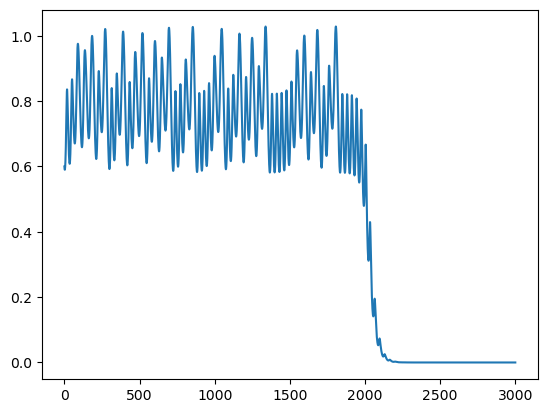

In [4]:
K = 0.974

R, C, P, t = EulerMethod(1, 3000, K) # K = 0.974

plt.plot(t, P)

In [5]:
trainlen = 7500
timePred = 3000 - (trainlen/5)
future = int(timePred*5)
window = 50

In [6]:
def run_esn(window):
    esn = ESN(n_inputs = 1, n_outputs=1, n_reservoir=512, sparsity=0.1)
    current_set = []
    for i in range(0, future, window):
        pred_training = esn.fit(np.ones(trainlen), P[i:trainlen+i])
        prediction = esn.predict(np.ones(window))
        for j in range(window):
            current_set.append(prediction[j])
    current_set = np.reshape(np.array(current_set), (-1, future))
    mse = mean_squared_error(P[trainlen:trainlen+future][np.newaxis], current_set)
    print("Mean Squared Error: ", mse)
    
    return (mse, current_set)

Mean Squared Error:  0.002724838349487526


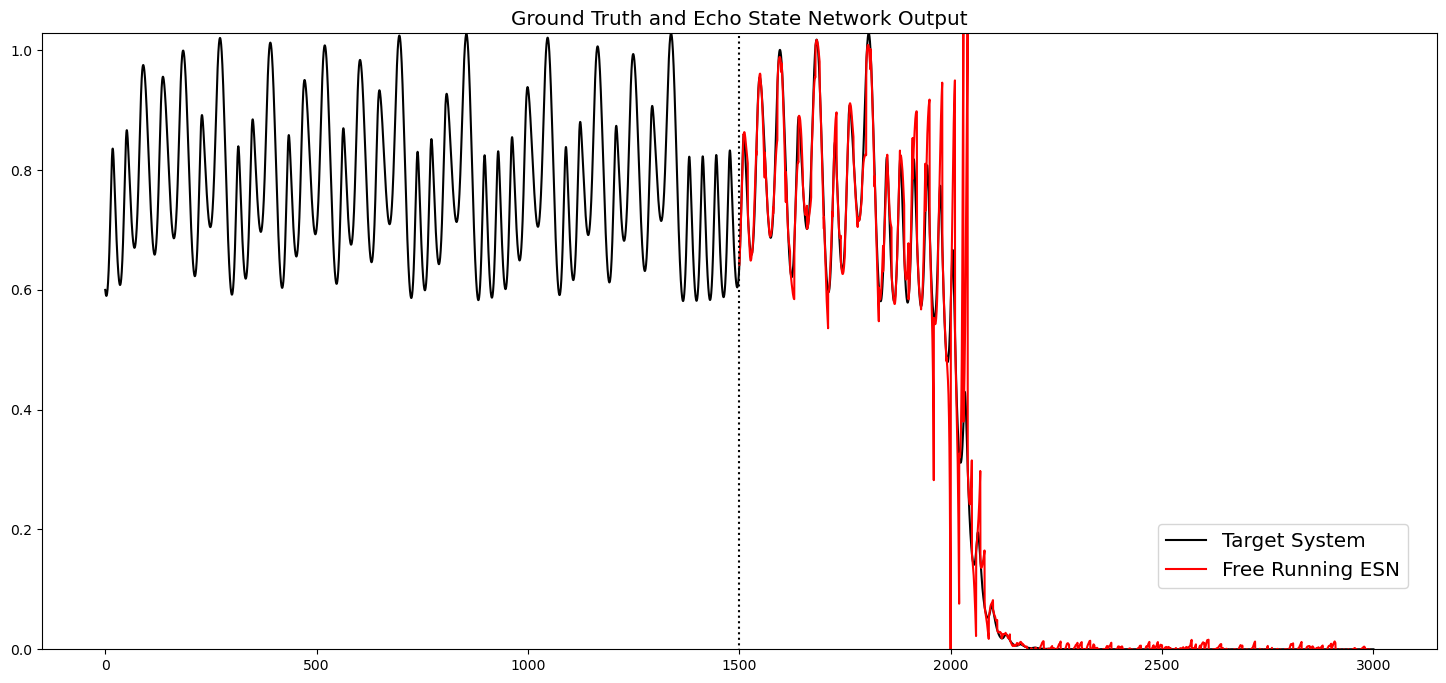

In [7]:
# Plotting the results
error, validation_set = run_esn(window)

plt.figure(figsize=(18, 8))
plt.plot(t[0:trainlen+future], P[0:trainlen+future], 'k', label="Target System")
plt.plot(t[trainlen:trainlen+future], validation_set.T, 'r', label="Free Running ESN")
lo, hi = plt.ylim()
plt.plot([t[trainlen], t[trainlen]], [lo+np.spacing(1), hi-np.spacing(1)], 'k:')
plt.legend(loc=(0.80, 0.1), fontsize='x-large')
plt.title(r'Ground Truth and Echo State Network Output', fontsize='x-large')
plt.ylim(0, max(P))
plt.show()

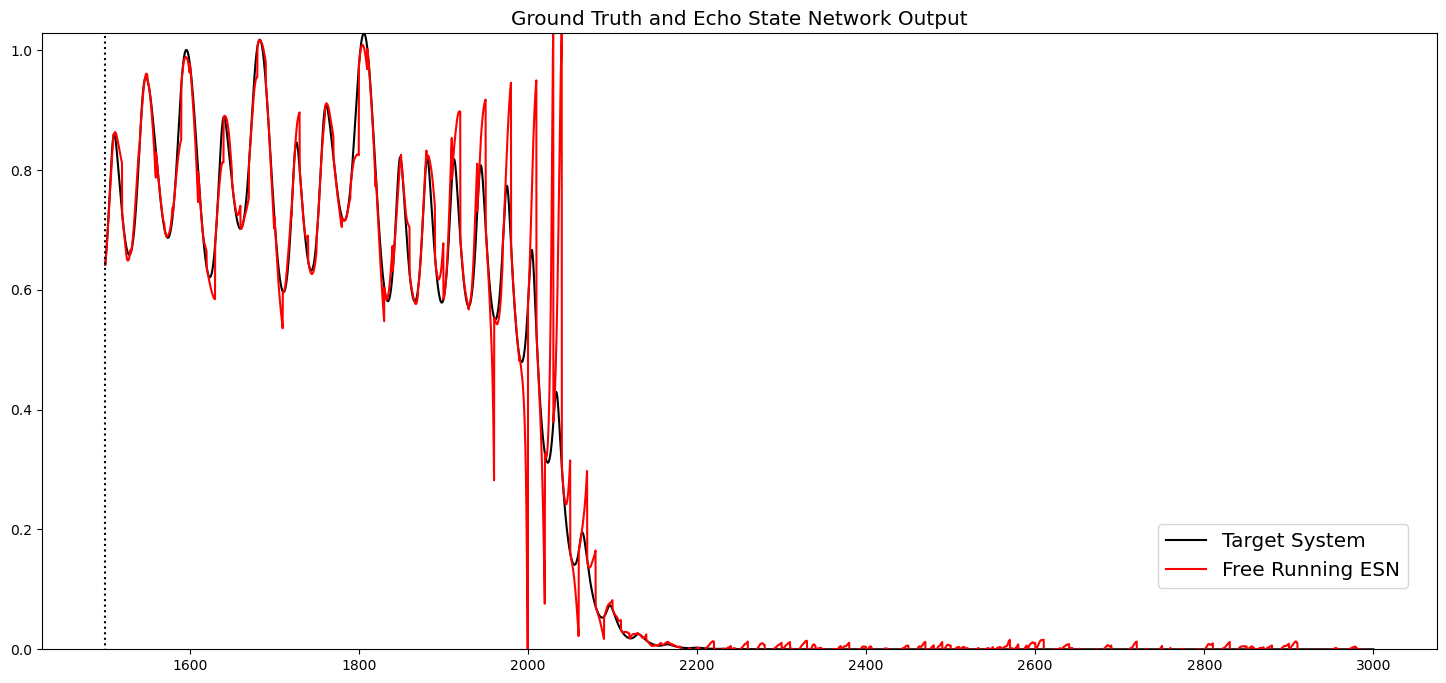

In [8]:
plt.figure(figsize=(18, 8))
plt.plot(t[trainlen:trainlen+future], P[trainlen:trainlen+future], 'k', label="Target System")
plt.plot(t[trainlen:trainlen+future], validation_set.T, 'r', label="Free Running ESN")
lo, hi = plt.ylim()
plt.plot([t[trainlen], t[trainlen]], [lo+np.spacing(1), hi-np.spacing(1)], 'k:')
plt.legend(loc=(0.80, 0.1), fontsize='x-large')
plt.title(r'Ground Truth and Echo State Network Output', fontsize='x-large')
plt.ylim(0, max(P))
plt.show()

In [9]:
# Window = 20

trainlen = 7500
timePred = 3000 - (trainlen/5)
future = int(timePred*5)
window = 20

Mean Squared Error:  4.456949062060919e-05


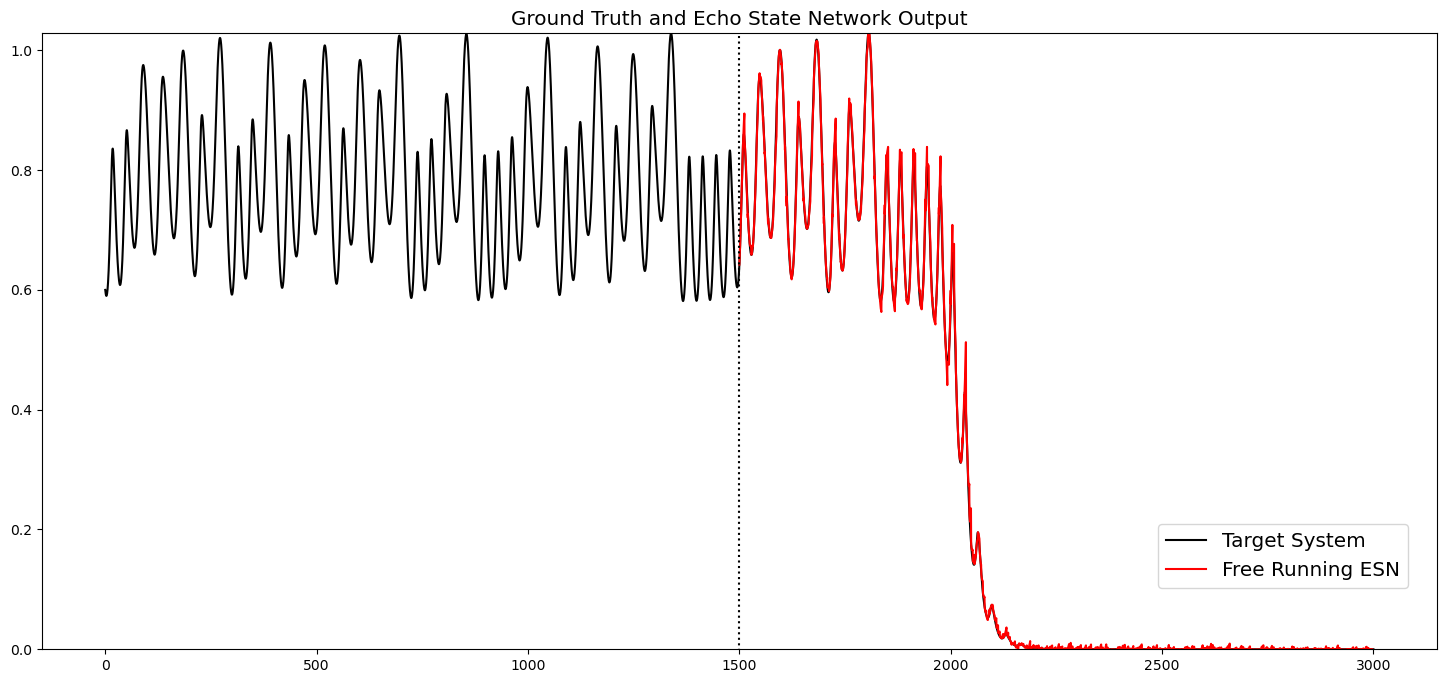

In [10]:
# Plotting the results
error, validation_set = run_esn(window)

plt.figure(figsize=(18, 8))
plt.plot(t[0:trainlen+future], P[0:trainlen+future], 'k', label="Target System")
plt.plot(t[trainlen:trainlen+future], validation_set.T, 'r', label="Free Running ESN")
lo, hi = plt.ylim()
plt.plot([t[trainlen], t[trainlen]], [lo+np.spacing(1), hi-np.spacing(1)], 'k:')
plt.legend(loc=(0.80, 0.1), fontsize='x-large')
plt.title(r'Ground Truth and Echo State Network Output', fontsize='x-large')
plt.ylim(0, max(P))
plt.show()

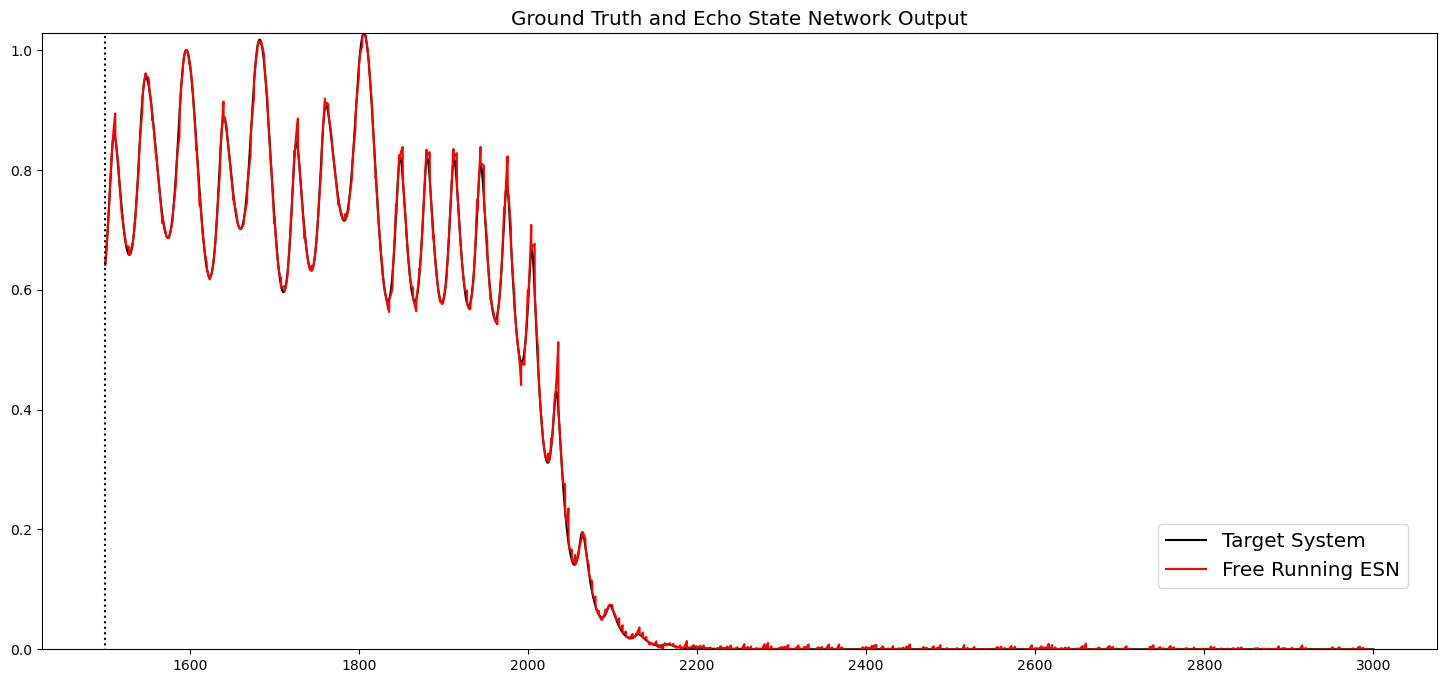

In [11]:
plt.figure(figsize=(18, 8))
plt.plot(t[trainlen:trainlen+future], P[trainlen:trainlen+future], 'k', label="Target System")
plt.plot(t[trainlen:trainlen+future], validation_set.T, 'r', label="Free Running ESN")
lo, hi = plt.ylim()
plt.plot([t[trainlen], t[trainlen]], [lo+np.spacing(1), hi-np.spacing(1)], 'k:')
plt.legend(loc=(0.80, 0.1), fontsize='x-large')
plt.title(r'Ground Truth and Echo State Network Output', fontsize='x-large')
plt.ylim(0, max(P))
plt.show()